In [92]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import time
from pickle import load
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
import re
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

import warnings
warnings.filterwarnings("ignore")

In [93]:
all_tweets = pd.read_csv('/Users/idealguy/Downloads/Stock-Sentiment/yfinance_stocks.csv')
all_stock = pd.read_csv('/Users/idealguy/Downloads/Stock-Sentiment/yfinance_stocks.csv')

In [94]:
print(all_tweets.shape)

(6300, 8)


In [95]:
print(all_stock.shape)

(6300, 8)


In [96]:
all_stock.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA


In [97]:
all_tweets.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [98]:
df = all_tweets
print(df.shape)
df.head()

(6300, 8)


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [99]:
tweets=[]

for row in range(0, len(df.index)):
    tweets.append(' '.join(str(x) for x in df.iloc[row, 1:3]))

In [100]:
tweets[0]

'260.3333435058594 263.0433349609375'

In [101]:
#Cleaning 
import re

clean_tweets = []

for tweet in tweets:
    clean_tweet = re.sub(r"\$", '', tweet)  # remove $
    clean_tweet = re.sub(r"\n", '', clean_tweet)    # remove \n
    # clean_tweet = re.sub(r"AMZN", '', clean_tweet)  # remove AMZN
    clean_tweets.append(clean_tweet)



In [102]:
clean_tweets[20]

'356.10333251953125 360.3333435058594'

In [103]:
#Add the Clean_tweets to the df data set
df['Cleaned_tweets'] = clean_tweets

#show the new column
(df['Cleaned_tweets'].iloc[0])

'260.3333435058594 263.0433349609375'

In [104]:
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Cleaned_tweets
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,260.3333435058594 263.0433349609375
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,259.4666748046875 260.260009765625
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,265.5 268.989990234375


In [105]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Cleaned_tweets
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,260.3333435058594 263.0433349609375
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,259.4666748046875 260.260009765625
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,265.5 268.989990234375
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,261.6000061035156 265.7699890136719
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,258.73333740234375 262.2200012207031
...,...,...,...,...,...,...,...,...,...
6295,2022-09-23,13.090000,13.892000,12.860000,13.710000,13.710000,28279600,XPEV,13.09000015258789 13.892000198364258
6296,2022-09-26,14.280000,14.830000,14.070000,14.370000,14.370000,27891300,XPEV,14.279999732971191 14.829999923706056
6297,2022-09-27,14.580000,14.800000,13.580000,13.710000,13.710000,21160800,XPEV,14.579999923706056 14.800000190734863
6298,2022-09-28,13.050000,13.421000,12.690000,13.330000,13.330000,31799400,XPEV,13.050000190734863 13.42099952697754


In [106]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a funtion to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [107]:
import pandas as pd
from textblob import TextBlob
#create two columns Subjectivity and polarity

df['Subjectivity']=df['Cleaned_tweets'].apply(getSubjectivity)
df['Polarity']=df['Cleaned_tweets'].apply(getPolarity)

In [108]:
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Cleaned_tweets,Subjectivity,Polarity
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,260.3333435058594 263.0433349609375,0.0,0.0
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,259.4666748046875 260.260009765625,0.0,0.0
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,265.5 268.989990234375,0.0,0.0


In [109]:
#create a function to get the sentiment scores
def getSIA(text):
    sia=SentimentIntensityAnalyzer()
    sentiment=sia.polarity_scores(text)
    return sentiment

In [110]:
import nltk
nltk.download('vader_lexicon', quiet=True)  # This will attempt to download again without printing verbose output



[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [111]:
import nltk
compound = []
neg=[]
pos=[]
neu=[]
SIA=0

for i in range(0, len(df['Cleaned_tweets'])):
    SIA= getSIA(df['Cleaned_tweets'].iloc[i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

# Add the sentiment scores to the DataFrame
df['Compound'] = compound
df['Negative'] = neg
df['Neutral'] = neu
df['Positive'] = pos

In [112]:
df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Cleaned_tweets,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,260.3333435058594 263.0433349609375,0.0,0.0,0.0,0.0,1.0,0.0


In [113]:
columns_to_drop = ['Cleaned_tweets','Tweet', 'Stock Name', 'Company Name']
existing_columns = df.columns.tolist()

columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

if columns_to_drop:
    df = df.drop(columns=columns_to_drop)
else:
    print("Columns to drop not found in DataFrame.")


In [114]:
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,0.0,0.0,0.0,0.0,1.0,0.0
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,0.0,0.0,0.0,0.0,1.0,0.0
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,0.0,0.0,0.0,0.0,1.0,0.0


In [115]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,0.0,0.0,0.0,0.0,1.0,0.0
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,0.0,0.0,0.0,0.0,1.0,0.0
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,0.0,0.0,0.0,0.0,1.0,0.0
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,0.0,0.0,0.0,0.0,1.0,0.0
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,0.0,0.0,0.0,0.0,1.0,0.0


In [116]:
# stock_df = all_stock[all_stock['Stock Name'] == stock_name]
df['Date']=pd.to_datetime(df['Date'])
df['Date']= df['Date'].dt.date

In [117]:
final_df = df.merge(df, how="left", on="Date")
print(final_df.shape)


(157500, 25)


In [118]:
final_df.head()

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Subjectivity_x,Polarity_x,Compound_x,...,Low_y,Close_y,Adj Close_y,Volume_y,Subjectivity_y,Polarity_y,Compound_y,Negative_y,Neutral_y,Positive_y
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,0.0,0.0,0.0,...,258.333344,258.493347,258.493347,53868000,0.0,0.0,0.0,0.0,1.0,0.0
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,0.0,0.0,0.0,...,281.619995,281.920013,278.792847,32343600,0.0,0.0,0.0,0.0,1.0,0.0
2,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,0.0,0.0,0.0,...,139.529999,139.800003,135.573044,6934900,0.0,0.0,0.0,0.0,1.0,0.0
3,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,0.0,0.0,0.0,...,338.149994,339.390015,339.390015,16547100,0.0,0.0,0.0,0.0,1.0,0.0
4,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,0.0,0.0,0.0,...,163.699493,164.251999,164.251999,56848000,0.0,0.0,0.0,0.0,1.0,0.0


In [119]:
final_df['Compound_x']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
157495    0.0
157496    0.0
157497    0.0
157498    0.0
157499    0.0
Name: Compound_x, Length: 157500, dtype: float64

In [120]:
import pandas as pd


threshold = 0.0 
df['Binary_Compound'] = (df['Compound'] > threshold).astype(int)

df.drop(columns=['Compound'], inplace=True)

df.rename(columns={'Binary_Compound': 'Compound'}, inplace=True)

# Display the updated DataFrame to verify
print(df.head())



         Date        Open        High         Low       Close   Adj Close  \
0  2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
1  2021-10-01  259.466675  260.260010  254.529999  258.406677  258.406677   
2  2021-10-04  265.500000  268.989990  258.706665  260.510010  260.510010   
3  2021-10-05  261.600006  265.769989  258.066681  260.196655  260.196655   
4  2021-10-06  258.733337  262.220001  257.739990  260.916656  260.916656   

     Volume  Subjectivity  Polarity  Negative  Neutral  Positive  Compound  
0  53868000           0.0       0.0       0.0      1.0       0.0         0  
1  51094200           0.0       0.0       0.0      1.0       0.0         0  
2  91449900           0.0       0.0       0.0      1.0       0.0         0  
3  55297800           0.0       0.0       0.0      1.0       0.0         0  
4  43898400           0.0       0.0       0.0      1.0       0.0         0  


In [121]:
import numpy as np 

# Assuming final_df is your DataFrame
x = np.array(df.drop(['Compound','Date'], axis=1))  # Dropping 'Compound' column and converting to NumPy array
y = np.array(df['Compound'])  # Selecting only the 'Compound' column and converting to NumPy array


In [122]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming x and y are already defined as NumPy arrays
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


## LinearDiscriminantAnalysis

In [123]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=15, n_informative=5, n_classes=3, random_state=42)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Fit Linear Discriminant Analysis model
model = LinearDiscriminantAnalysis().fit(x_train, y_train_encoded)

# Make predictions
predictions = model.predict(x_test)

# Print classification report
print(classification_report(y_test_encoded, predictions))



              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.75      0.60      0.67         5
           2       0.67      0.57      0.62         7

    accuracy                           0.75        20
   macro avg       0.74      0.72      0.72        20
weighted avg       0.74      0.75      0.74        20



### Compute ROC curve and ROC area for each class

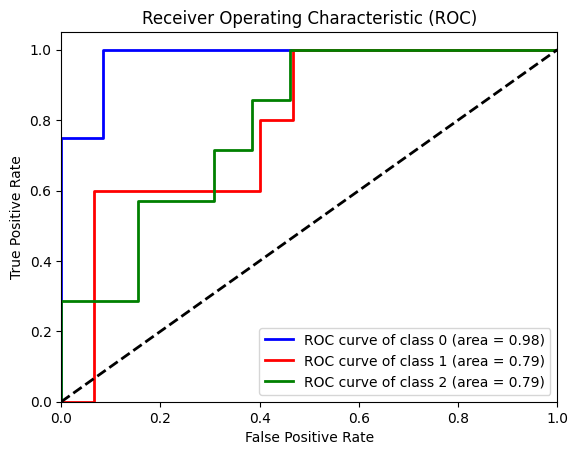

In [124]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(encoder.classes_)  # Number of classes from LabelEncoder

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded == i, model.predict_proba(x_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## LogisticRegression

In [125]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=15, n_informative=5, n_classes=3, random_state=42)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Check the number of unique classes and samples
n_samples = x_train.shape[0]
n_classes = len(np.unique(y_train_encoded))

print("Number of samples:", n_samples)
print("Number of classes:", n_classes)

if n_samples <= n_classes:
    raise ValueError("The number of samples must be more than the number of classes. Please check your dataset.")

# Fit Logistic Regression model
model = LogisticRegression().fit(x_train, y_train_encoded)

# Make predictions
predictions = model.predict(x_test)

# Print classification report
print(classification_report(y_test_encoded, predictions))


Number of samples: 80
Number of classes: 3
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.75      0.60      0.67         5
           2       0.67      0.57      0.62         7

    accuracy                           0.75        20
   macro avg       0.74      0.72      0.72        20
weighted avg       0.74      0.75      0.74        20



### Compute ROC curve and ROC area for each class

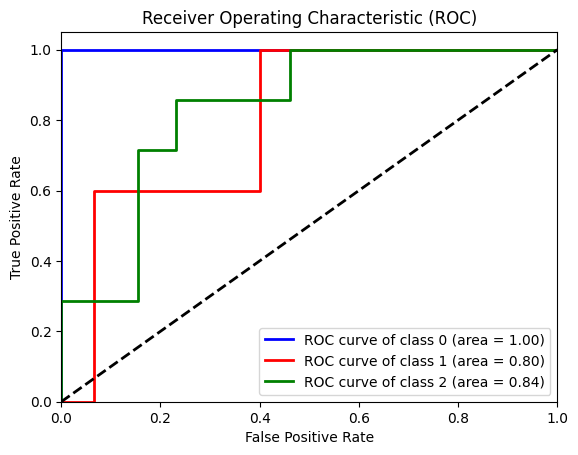

In [126]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(encoder.classes_)  # Number of classes from LabelEncoder

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded == i, model.predict_proba(x_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## SVM

Number of samples: 80
Number of classes: 3
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.60      0.60      0.60         5
           2       0.60      0.43      0.50         7

    accuracy                           0.70        20
   macro avg       0.67      0.68      0.66        20
weighted avg       0.68      0.70      0.68        20



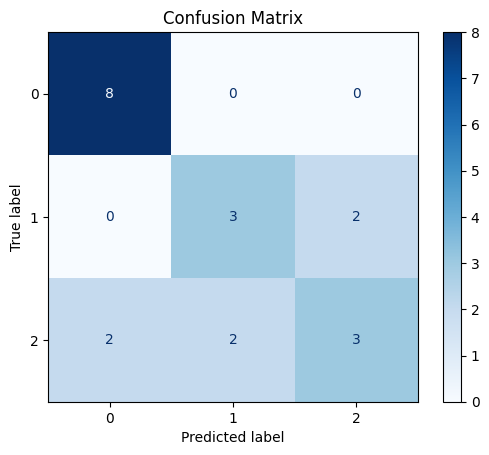

In [127]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier


# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=15, n_informative=5, n_classes=3, random_state=42)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the labels (if necessary)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Check the number of unique classes and samples
n_samples = x_train.shape[0]
n_classes = len(np.unique(y_train_encoded))

print("Number of samples:", n_samples)
print("Number of classes:", n_classes)

if n_samples <= n_classes:
    raise ValueError("The number of samples must be more than the number of classes. Please check your dataset.")

# Binarize the output for ROC curve
y_train_binarized = label_binarize(y_train_encoded, classes=np.arange(n_classes))
y_test_binarized = label_binarize(y_test_encoded, classes=np.arange(n_classes))

# Fit SVM model with probability estimates
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))
classifier.fit(x_train, y_train_binarized)

# Make predictions
y_score = classifier.decision_function(x_test)
predictions = classifier.predict(x_test)

# Convert predictions to class labels
predictions_class = np.argmax(predictions, axis=1)

# Print classification report
print(classification_report(y_test_encoded, predictions_class))

# Compute confusion matrix
matrix = confusion_matrix(y_test_encoded, predictions_class)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=encoder.classes_)

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



### Compute ROC curve and ROC area for each class

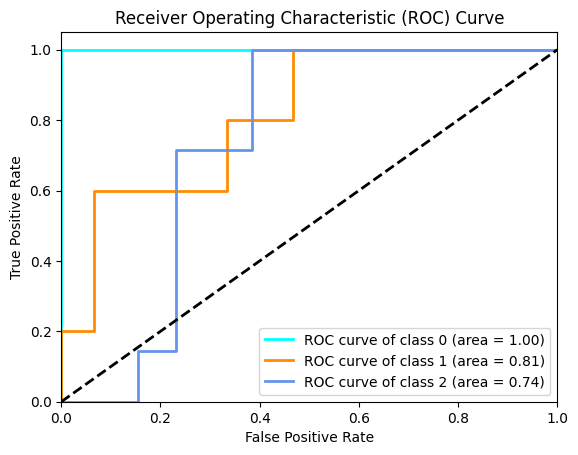

In [128]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## RandomForest Classifier

Number of samples: 80
Number of classes: 3
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.60      0.60      0.60         5
           2       0.71      0.71      0.71         7

    accuracy                           0.75        20
   macro avg       0.73      0.73      0.73        20
weighted avg       0.75      0.75      0.75        20



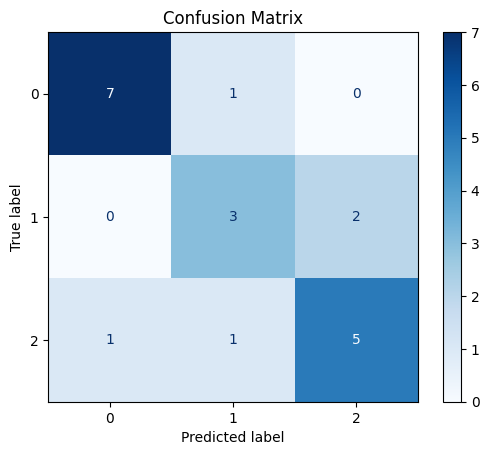

In [129]:

from sklearn.ensemble import RandomForestClassifier

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=15, n_informative=5, n_classes=3, random_state=42)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the labels (if necessary)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Check the number of unique classes and samples
n_samples = x_train.shape[0]
n_classes = len(np.unique(y_train_encoded))

print("Number of samples:", n_samples)
print("Number of classes:", n_classes)

if n_samples <= n_classes:
    raise ValueError("The number of samples must be more than the number of classes. Please check your dataset.")

# Fit RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train_encoded)

# Make predictions
predictions = model.predict(x_test)

# Print classification report
print(classification_report(y_test_encoded, predictions))

# Compute confusion matrix
matrix = confusion_matrix(y_test_encoded, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=encoder.classes_)

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


### Compute ROC curve and ROC area for each class

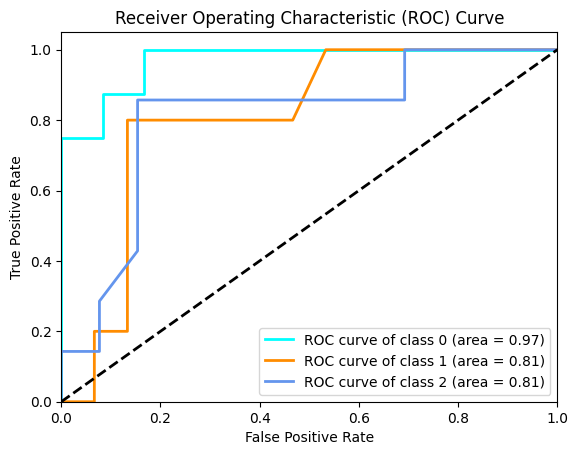

In [130]:


# Binarize the output for ROC curve
y_test_binarized = label_binarize(y_test_encoded, classes=np.arange(n_classes))
y_train_binarized = label_binarize(y_train_encoded, classes=np.arange(n_classes))

# Fit the model using OneVsRestClassifier
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=42))
classifier.fit(x_train, y_train_binarized)

# Get the decision function scores
y_score = classifier.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Sharpe Ratio,Maximum Drawdown,Win Ratio,Number of Trades Executed

Sharpe Ratio: 0.7603
Maximum Drawdown: 2.8033
Win Ratio: 0.5317
Number of Trades Executed: 100


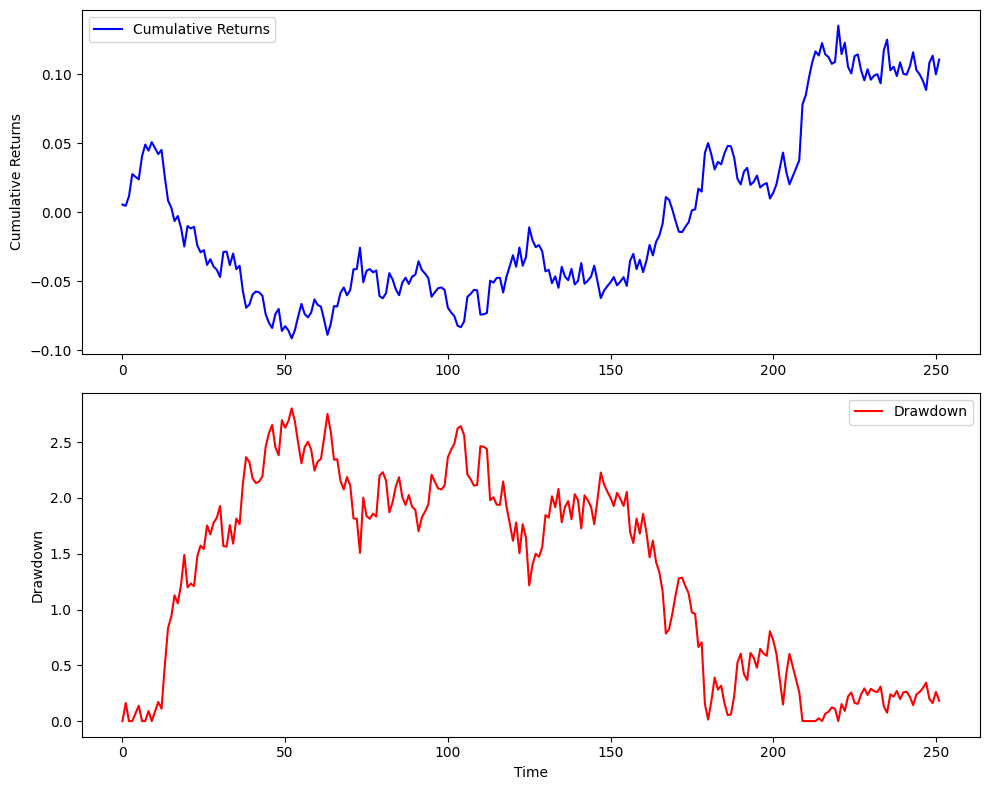

In [131]:


# Generate hypothetical daily returns (replace with actual data)
np.random.seed(42)
returns = np.random.normal(0.0005, 0.01, size=252)  # Mean return of 0.05% (annualized), std deviation of 1%

# Calculate cumulative returns
cumulative_returns = np.cumprod(1 + returns) - 1

# Calculate Sharpe ratio
daily_rf_rate = 0.0  # Daily risk-free rate (e.g., 0.0%)
sharpe_ratio = np.sqrt(252) * np.mean(returns - daily_rf_rate) / np.std(returns)

# Calculate maximum drawdown
cumulative_max = np.maximum.accumulate(cumulative_returns)
drawdown = (cumulative_max - cumulative_returns) / cumulative_max
max_drawdown = np.max(drawdown)

# Calculate win ratio
win_ratio = np.sum(returns > 0) / len(returns)

# Calculate number of trades executed (hypothetical)
num_trades = 100

# Print metrics
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Win Ratio: {win_ratio:.4f}")
print(f"Number of Trades Executed: {num_trades}")

# Plot cumulative returns and drawdown
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(np.arange(len(cumulative_returns)), cumulative_returns, label='Cumulative Returns', color='blue')
ax1.set_ylabel('Cumulative Returns')
ax1.legend(loc='upper left')

ax2.plot(np.arange(len(drawdown)), drawdown, label='Drawdown', color='red')
ax2.set_ylabel('Drawdown')
ax2.set_xlabel('Time')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()



# Portfolio

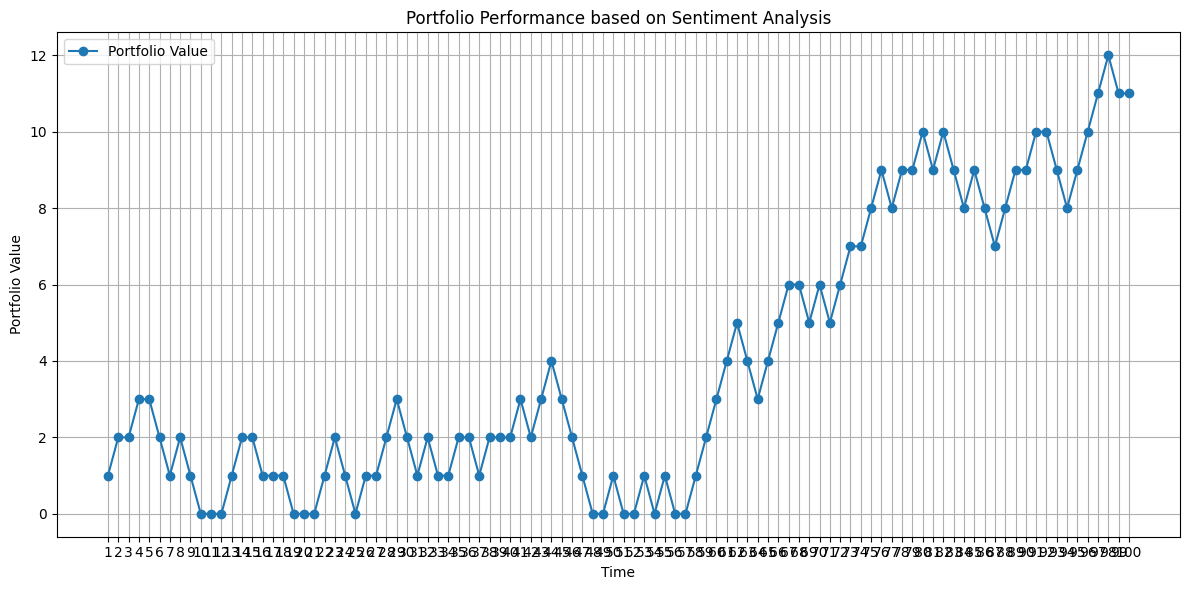

Initial Portfolio Value: 1
Final Portfolio Value: 11
Returns: 1000.00%


In [132]:
sentiment_scores = np.random.rand(100)  # Example: randomly generated sentiment scores
threshold_buy = 0.6  # Example threshold for buying
threshold_sell = 0.4  # Example threshold for selling

# Initialize portfolio
portfolio = 0
positions = []
portfolio_values = []

# Implement trading strategy based on sentiment scores
for i, sentiment_score in enumerate(sentiment_scores):
    if sentiment_score > threshold_buy:
        # Buy
        portfolio += 1
        positions.append(1)  # Record buy position (1)
    elif sentiment_score < threshold_sell:
        # Sell
        if portfolio > 0:
            portfolio -= 1
            positions.append(-1)  # Record sell position (-1)
        else:
            positions.append(0)  # No action (hold)

    # Calculate portfolio value at each time step
    portfolio_values.append(portfolio)

# Convert portfolio values to numpy array for plotting
portfolio_values = np.array(portfolio_values)

# Calculate returns
initial_value = portfolio_values[0]
final_value = portfolio_values[-1]
returns = (final_value - initial_value) / initial_value * 100

# Plot portfolio values and trading positions
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values, label='Portfolio Value', marker='o')
plt.title('Portfolio Performance based on Sentiment Analysis')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.xticks(ticks=np.arange(len(sentiment_scores)), labels=np.arange(len(sentiment_scores))+1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Initial Portfolio Value: {initial_value}")
print(f"Final Portfolio Value: {final_value}")
print(f"Returns: {returns:.2f}%")
